### Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

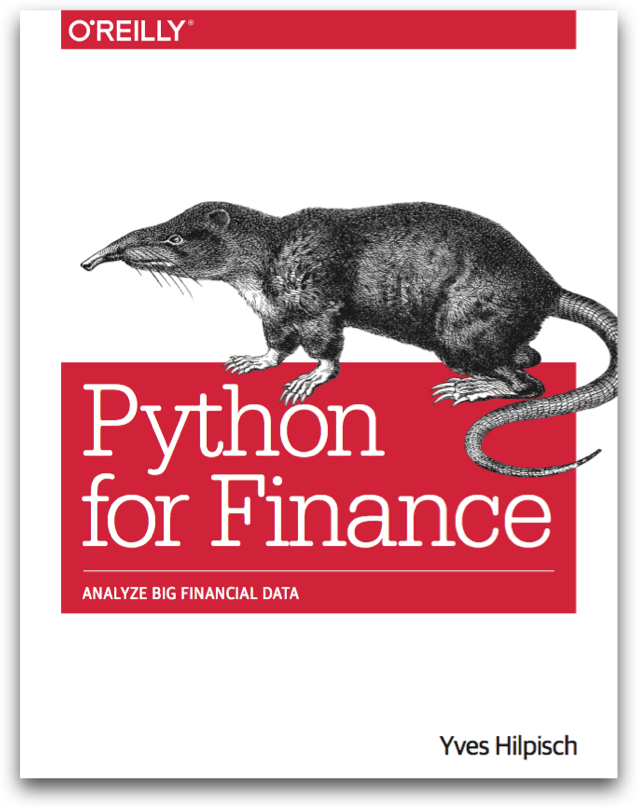

**Buy the book** | O'Reilly | Amazon

**All book codes & IPYNBs** | http://oreilly.quant-platform.com

**The Python Quants GmbH** | http://tpq.io

**Contact us** | pff@tpq.io

### Introduction

In [9]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


### Finance and Python Syntax

In [10]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [11]:
from numpy import *

I = 100000

random.seed(1000)
z = random.standard_normal(I)
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [12]:
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 9.149


### Time-to-Results

In [13]:
import numpy as np
import pandas as pd

In [14]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('C:/Users/502689880/Practice/Python for Finance/source/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
amzn = pd.DataFrame(raw['AMZN.O'])
amzn.columns = ['Close']
amzn.tail()

,Close
Date,
2017-10-25,972.91
2017-10-26,972.43
2017-10-27,1100.95
2017-10-30,1110.85
2017-10-31,1105.28


In [15]:
amzn['Log_Ret'] = np.log(amzn['Close'] / amzn['Close'].shift(1))
amzn['Volatility'] = amzn['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

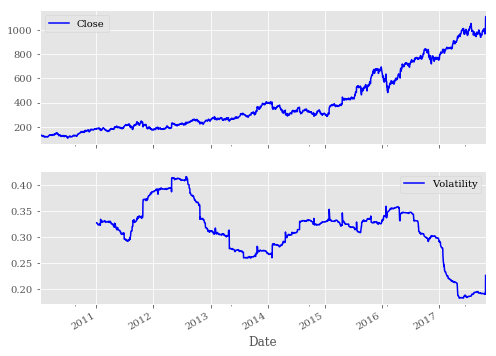

In [16]:
%matplotlib inline
amzn[['Close', 'Volatility']].plot(subplots=True, color='blue',
                                   figsize=(8, 6), grid=True);
# tag: amzn_vola
# title: Amazon closing prices and yearly volatility

### Paradigm

In [17]:
loops = 2500000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

1.78 s ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

101 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

71.4 ms ± 6.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

33.4 ms ± 623 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
